### Good Turing - UniGram

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import re
from nltk.corpus import words
import math
import pickle

In [2]:
df = pd.read_csv('Data/Unprocessed_Data/unigram.csv')
df.head()

,Word,Count,Prob
0,[START],264721,0.061630
1,[END],264721,0.061630
2,the,150539,0.035047
3,to,94517,0.022005
4,and,83257,0.019383


In [3]:
len(df)

89212

In [4]:
## Making Dict of count : words
uni_good = {}
for i in range(len(df)):
    if df.iloc[i][1] in uni_good:
        uni_good[df.iloc[i][1]].append(df.iloc[i][0])
    else:
        uni_good[df.iloc[i][1]] = [df.iloc[i][0]]

In [5]:
## Importing Vocabulary
with open('Vocabulary.pkl','rb') as file:
    vocabulary = pickle.load(file)

$$
\begin{align*}
\text{Good Turning Formula : }
c^* = \frac{(c+1)N_{c+1}}{N_c} 
\end{align*}
$$

In [25]:
## temp{} - c* : list of n-grams
temp = {}
for i in range(200,0,-1):
    ## i+1 == c+1
    ## len(uni_good[i+1]) = N_c+1
    ## len(uni_good[i]) = N_c
    ## c_star = c*
    c_star = (i+1)*len(uni_good[i+1])/len(uni_good[i])

    ##If count already present just add small value
    while c_star in temp:
        c_star = c_star+0.001
    temp[c_star] = uni_good[i]

##### Calculating Probabilities

In [26]:
new_count = np.sum(np.array(list(temp.keys())))

In [27]:
## Making Dict for prob. -- word : prob
good_turining_count = {}

for i in temp:
    for j in temp[i]:
        good_turining_count[j] = i

## Adding rest of corpus
for i in uni_good:
    if i <= 200:
        break
    for j in uni_good[i]:
        good_turining_count[j] = i

In [28]:
## 0th Count
zero_count = len(uni_good[1])/(len(vocabulary)-len(df))
print(zero_count)

4.151997738409348


In [29]:
### Getting sum of all the counts
sum = np.sum(np.array(list(good_turining_count.values()))) + zero_count
print(sum)

4253282.184258285


In [30]:
#### Converting good_turining_count dict from count to probability
for i in good_turining_count:
    good_turining_count[i] = good_turining_count[i]/sum

good_turining_count[0] = zero_count/sum

In [31]:
print("Sum of Prob = " + str(np.sum(np.array(list(good_turining_count.values())))))

Sum of Prob = 0.9999999999999999


In [32]:
good_turining_count[-1] = len(df)

In [33]:
with open("unigram_prob.pkl", "wb") as pickle_file:
    pickle.dump(good_turining_count, pickle_file)

### Testing

In [44]:
df = pd.read_csv('Data/testing_data.txt',
                 delimiter='\t',header=None, names=['Text'])
df.head()

,Text
0,"[START], woh, banda, kahan, hai, jo, kal, keh,..."
1,"[START], the, junta, will, end, up, with, a, b..."
2,"[START], that, doesn't, disprove, anything, i,..."
3,"[START], international, trade, relationships, ..."
4,"[START], hamare, pet, ki, bas, ki, bat, nhi, r..."


In [45]:
len(df)

66180

$$ log[PP(Perplexity)] = -\frac{1}{N} [log(P(w_1)) + ...  log(P(w_n))] $$

In [46]:
arr_pp = []
log_sum = 0
for j in range(len(df)):
    string1 = df.iloc[j][0].split(", ")
    for i in string1:
        if i in good_turining_count:
            log_sum += math.log(good_turining_count[i])
        else:
            log_sum += math.log(good_turining_count[0])
    log_pp = -log_sum/len(string1)
    arr_pp.append(log_pp)

In [47]:
with open("Backup/perplexity_unigram.pkl", "wb") as pickle_file:
    pickle.dump(arr_pp, pickle_file)

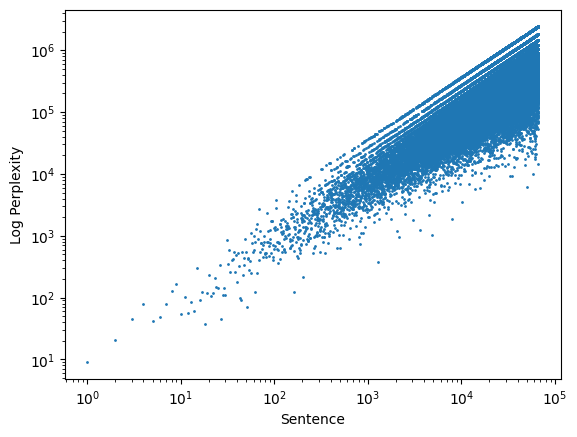

In [48]:
### PLoting the graph
x = list(range(1,len(df)+1))
plt.scatter(x,arr_pp,s=1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Sentence')
plt.ylabel('Log Perplexity')
plt.show()

In [49]:
## Importing Additive - 1 data
df = pd.read_csv('Data/Additive/unigram_Perplexity_with_smoothing.csv')
df.head()

,Unnamed: 0,Data,Perplexity
0,0,"[START], woh, banda, kahan, hai, jo, kal, keh,...",13605.077948
1,1,"[START], the, junta, will, end, up, with, a, b...",1179.558606
2,2,"[START], that, doesn't, disprove, anything, i,...",1881.656932
3,3,"[START], international, trade, relationships, ...",13400.217768
4,4,"[START], hamare, pet, ki, bas, ki, bat, nhi, r...",24903.690627


In [50]:
additive_pp = list(df.iloc[:-1,2])

In [52]:
len(x)

66181

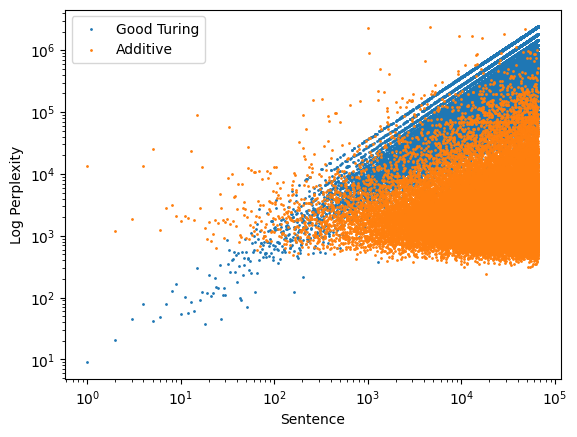

In [57]:
### PLoting the graph
x = list(range(1,len(arr_pp)+1))
plt.scatter(x,arr_pp,s=1,label='Good Turing')
plt.scatter(x,additive_pp,s=1,label = 'Additive')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Sentence')
plt.ylabel('Log Perplexity')
plt.legend()
plt.show()

As per the above image we can see that Additive-1 smoothing is performing slightly better than Good turing.
But there are little data points Good Turing is performing significantly better than Additive Smoothing